In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
file_path = "leky.xls"
data = pd.read_excel(file_path)
data = data.drop([0,1])
col_names = ['CRF', 'W0CBT1', 'W0CBT2', 'W0CBT3', 'W0IOP', 'W2CBT1', 'W2CBT2', 'W2CBT3', 'W2IOP', 'W8CBT1', 'W8CBT2', 'W8CBT3', 'W8IOP']
data.columns = col_names
data = data.drop('CRF', axis=1)
data[['W0CBT1', 'W0CBT2', 'W0CBT3']] = data[['W0CBT1', 'W0CBT2', 'W0CBT3']].astype(float)
data[['W2CBT1', 'W2CBT2', 'W2CBT3']] = data[['W2CBT1', 'W2CBT2', 'W2CBT3']].astype(float)
data[['W8CBT1', 'W8CBT2', 'W8CBT3']] = data[['W8CBT1', 'W8CBT2', 'W8CBT3']].astype(float)
data[['W0IOP', 'W2IOP', 'W8IOP']] = data[['W0IOP', 'W2IOP', 'W8IOP']].astype(int)
data.reset_index(drop=True, inplace=True)


Podíváme se na rozdělení veličin pomocí violin plotů.

In [41]:
import statsmodels
s = sns.color_palette('crest',10)
def generate_violin(varname):
    fig, ax = plt.subplots(figsize=(8,7))
    statsmodels.graphics.boxplots.violinplot([data[f'W0{varname}'], data[f'W2{varname}'], data[f'W8{varname}']], ax=ax,
                                            labels=['Před', 'Po 2 týdnech', 'Po 8 týdnech'],
                                            plot_opts={'violin_fc':s[2], 'label_fontsize':20})
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(f'{varname}', fontsize=20)
    #plt.savefig(f"violin_{varname}.svg", format="svg")


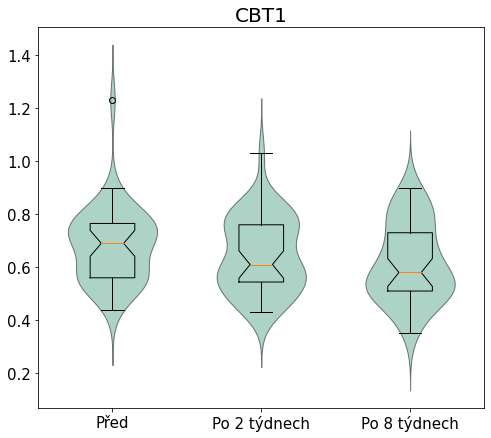

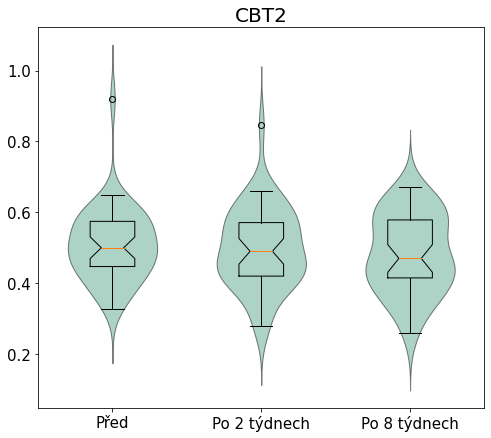

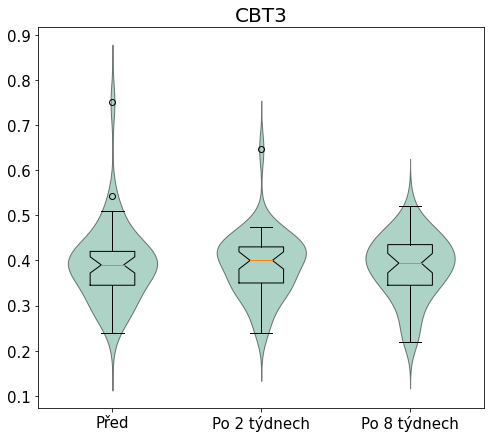

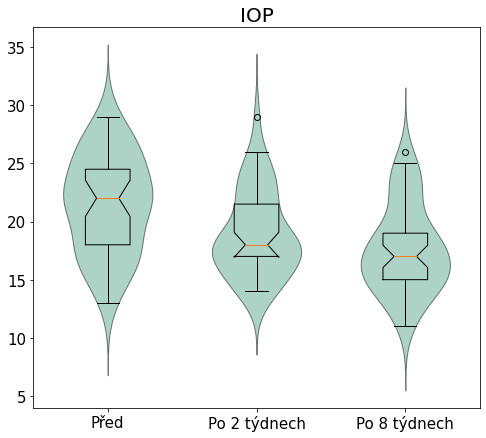

In [42]:
varlist = ['CBT1', 'CBT2', 'CBT3', 'IOP']
for var in varlist:
    generate_violin(var)

In [43]:
#smazat odlehlá pozorování
data = data[data['W0CBT1'] <= 1]
data = data[data['W2CBT1'] <= 1]
data.reset_index(drop=True, inplace=True)

In [44]:
#deskriptivni statistiky
data.describe().round(2)

,W0CBT1,W0CBT2,W0CBT3,W0IOP,W2CBT1,W2CBT2,W2CBT3,W2IOP,W8CBT1,W8CBT2,W8CBT3,W8IOP
count,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,0.67,0.50,0.39,21.46,0.64,0.49,0.39,19.05,0.62,0.49,0.39,17.76
std,0.12,0.08,0.09,4.30,0.13,0.10,0.06,3.67,0.15,0.11,0.07,3.77
min,0.44,0.33,0.24,13.00,0.43,0.28,0.24,14.00,0.35,0.26,0.22,11.00
25%,0.56,0.44,0.34,18.00,0.54,0.42,0.35,17.00,0.50,0.41,0.35,15.00
50%,0.69,0.50,0.39,22.00,0.60,0.49,0.40,18.00,0.58,0.48,0.40,17.00
75%,0.76,0.57,0.42,25.00,0.75,0.57,0.43,22.00,0.75,0.58,0.44,19.00
max,0.90,0.65,0.75,29.00,0.83,0.66,0.48,29.00,0.90,0.67,0.52,26.00


## Ověření předpokladů pro ANOVA model

In [45]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

#### Normalita

In [46]:
#vraci ks statistiku, pvalue:pokud je menší než náš threshold(0.05) tak zamítáme
def test_lilliefors(varname):
    print(f"{varname}:")
    print('W0', lilliefors(data[f'W0{varname}'], dist = 'norm'))
    print('W2', lilliefors(data[f'W2{varname}'], dist = 'norm'))
    print('W8',lilliefors(data[f'W8{varname}'], dist = 'norm'))

In [48]:
test_lilliefors('CBT1')
test_lilliefors('CBT2')
test_lilliefors('CBT3')
test_lilliefors('IOP')

CBT1:
W0 (0.13148288023452126, 0.07188950574593955)
W2 (0.1277844091868663, 0.09016340888705102)
W8 (0.1364360507365932, 0.05256743130272252)
CBT2:
W0 (0.0899062406250366, 0.5466507477355832)
W2 (0.11320017495852897, 0.2116065520259822)
W8 (0.08978301432910762, 0.548909897262392)
CBT3:
W0 (0.14822737397882824, 0.023846252536712142)
W2 (0.14945949852112428, 0.02235813748238769)
W8 (0.10648223318246203, 0.2858412106895937)
IOP:
W0 (0.1310886027401364, 0.07342756285392779)
W2 (0.19792598704117487, 0.0009999999999998899)
W8 (0.12693175241809096, 0.09462005315581659)


In [49]:
def generate_qqplots(varname):
    fig, ax = plt.subplots(1,3, figsize=(20, 20/3))
    sm.graphics.qqplot(data[f'W0{varname}'], line="r", ax=ax[0])
    ax[0].set_title(f'{varname}-před', fontsize=20)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    sm.graphics.qqplot(data[f'W2{varname}'], line="r", ax=ax[1])
    ax[1].set_title(f'{varname}-po 2 týdnech', fontsize=20)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    sm.graphics.qqplot(data[f'W8{varname}'], line="r", ax=ax[2])
    ax[2].set_title(f'{varname}-po 8 týdnech', fontsize=20)
    ax[2].set_xlabel('')
    ax[2].set_ylabel('')
    fig.tight_layout()
    #fig.savefig(f'{varname}_qqplot.svg', format='svg')

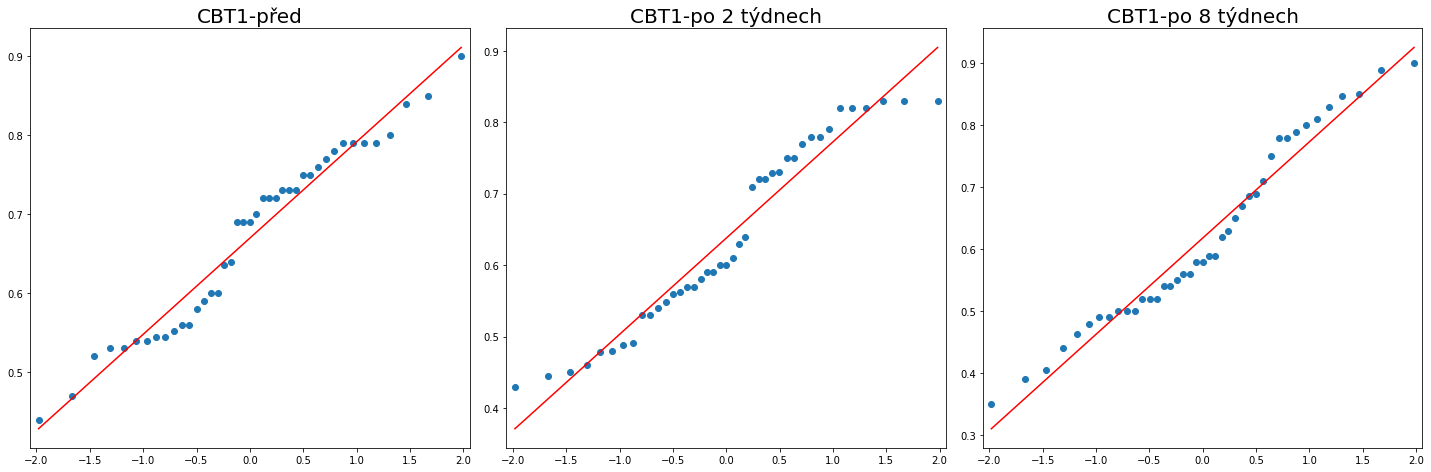

In [50]:
generate_qqplots('CBT1')

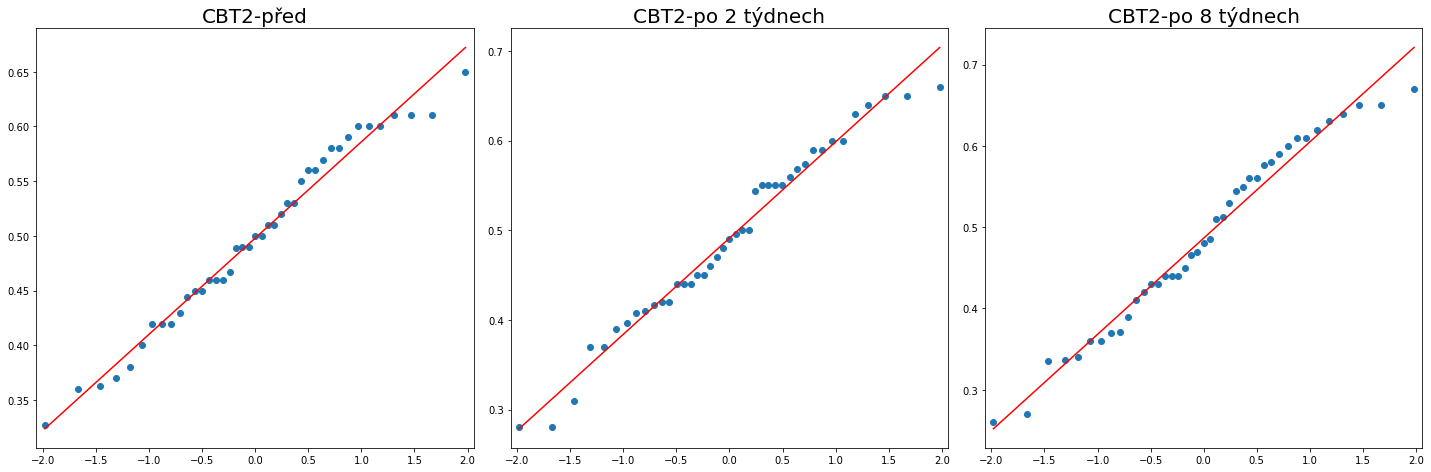

In [139]:
generate_qqplots('CBT2')

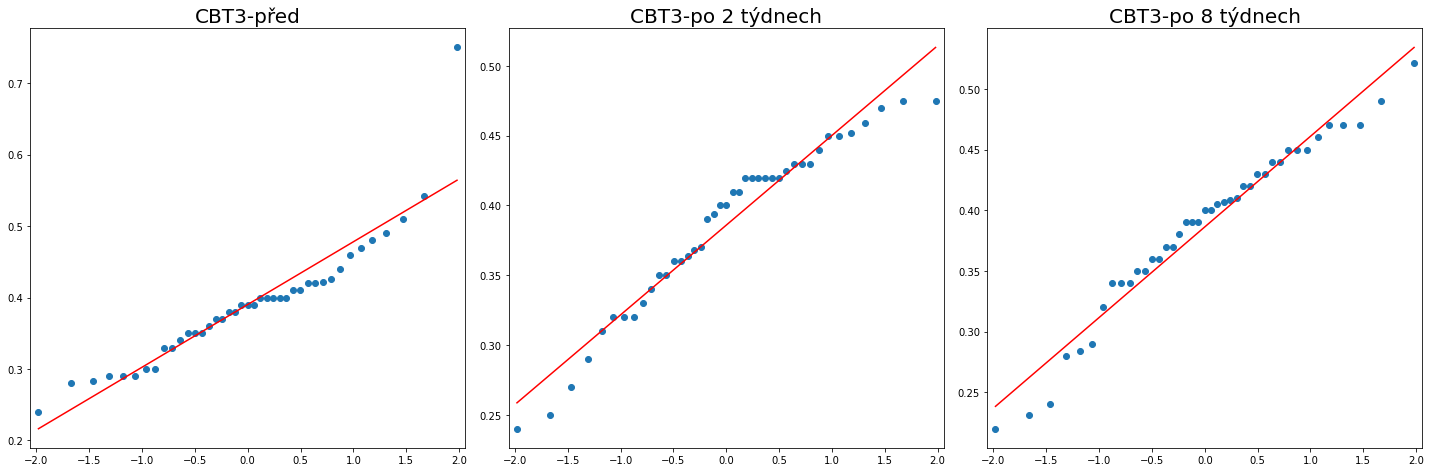

In [144]:
generate_qqplots('CBT3')

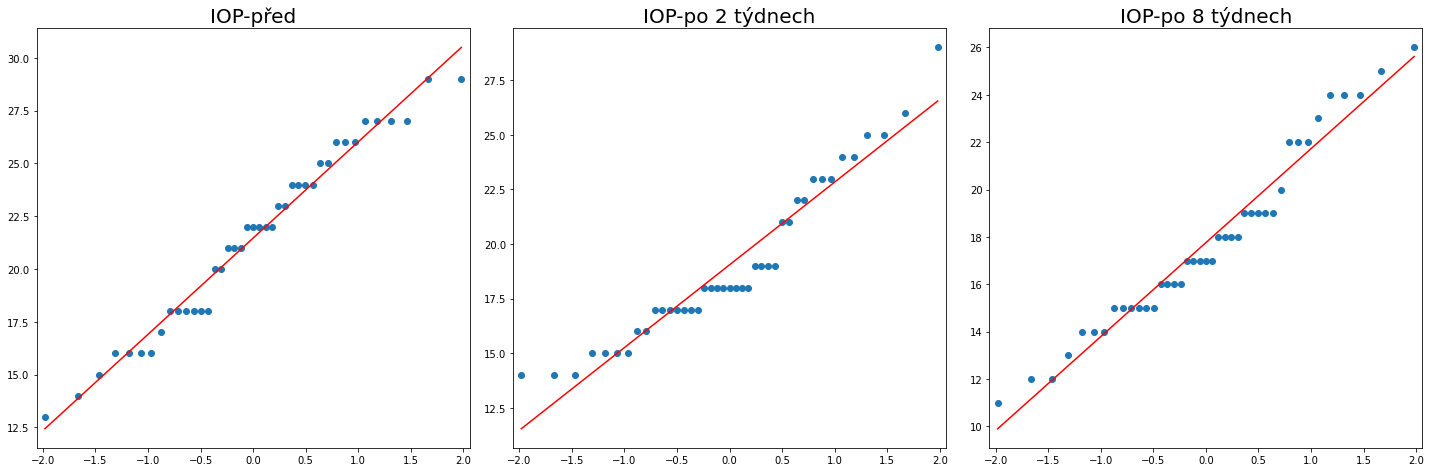

In [141]:
generate_qqplots('IOP')

#### Rovnost rozptylů

In [51]:
from scipy.stats import bartlett, levene

In [54]:
print(bartlett(data['W0CBT1'], data['W2CBT1'], data['W8CBT1']))
print(bartlett(data['W0CBT2'], data['W2CBT2'], data['W8CBT2']))
print(bartlett(data['W0CBT3'], data['W2CBT3'], data['W8CBT3']))
print(bartlett(data['W0IOP'], data['W2IOP'], data['W8IOP']))


BartlettResult(statistic=2.345538763793991, pvalue=0.3095086057549126)
BartlettResult(statistic=3.5366167344303716, pvalue=0.1706213735453947)
BartlettResult(statistic=5.394600428631725, pvalue=0.06738719836671052)
BartlettResult(statistic=1.1761174862945942, pvalue=0.5554044215359728)


In [53]:
#pro CBT3 a IOP pro jistotu i leveneho test
print(levene(data['W0CBT3'], data['W2CBT3'], data['W8CBT3']))
print(levene(data['W0IOP'], data['W2IOP'], data['W8IOP']))

LeveneResult(statistic=0.45165104751333773, pvalue=0.637653896518297)
LeveneResult(statistic=1.1727458610909578, pvalue=0.31303760795903707)


### ANOVA 

In [56]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [61]:
#klasickou ANOVu můžeme použít jenom na CBT1 a CBT2
print(f_oneway(data['W0CBT1'], data['W2CBT1'], data['W8CBT1'])) #vraci F statistiku a p-value
print(f_oneway(data['W0CBT2'], data['W2CBT2'], data['W8CBT2']))

F_onewayResult(statistic=1.6034532487960695, pvalue=0.20548094820898874)
F_onewayResult(statistic=0.13787372965673342, pvalue=0.8713465003819377)


In [62]:
long_data = pd.melt(data, value_vars=['W0CBT1', 'W2CBT1', 'W8CBT1'], var_name='Class', value_name='Value')
model = ols('Value ~ Class', data=long_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
#class-mezi tridami


,sum_sq,df,F,PR(>F)
Class,0.055484,2.0,1.603453,0.205481
Residual,2.076167,120.0,NaN,NaN


In [64]:
long_data = pd.melt(data, value_vars=['W0CBT2', 'W2CBT2', 'W8CBT2'], var_name='Class', value_name='Value')
model = ols('Value ~ Class', data=long_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Class,0.002721,2.0,0.137874,0.871347
Residual,1.184230,120.0,NaN,NaN


### Kruskal-Wallis

In [18]:
from scipy.stats import kruskal

In [65]:
print(kruskal(data['W0CBT3'], data['W2CBT3'], data['W8CBT3']))
print(kruskal(data['W0IOP'], data['W2IOP'], data['W8IOP']))

KruskalResult(statistic=0.2771326787347827, pvalue=0.8706054939356299)
KruskalResult(statistic=14.962233510260296, pvalue=0.0005636276299327339)


#### vícenásobné porovnávání

In [21]:
from scipy.stats import tukey_hsd

In [66]:
tukey_iop = tukey_hsd(data['W0IOP'], data['W2IOP'], data['W8IOP'])
print(tukey_iop) #1 a 2 stejné means, ale nula má jiný mean

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.415     0.017     0.358     4.471
 (0 - 2)      3.707     0.000     1.651     5.764
 (1 - 0)     -2.415     0.017    -4.471    -0.358
 (1 - 2)      1.293     0.299    -0.764     3.349
 (2 - 0)     -3.707     0.000    -5.764    -1.651
 (2 - 1)     -1.293     0.299    -3.349     0.764



#### párový t-test

In [26]:
from scipy.stats import ttest_rel

In [67]:
print(ttest_rel(data['W0IOP'], data['W2IOP']))
print(ttest_rel(data['W0IOP'], data['W8IOP']))

Ttest_relResult(statistic=4.154679245582483, pvalue=0.00016639401908025703)
Ttest_relResult(statistic=5.868550902239969, pvalue=7.233452154475577e-07)


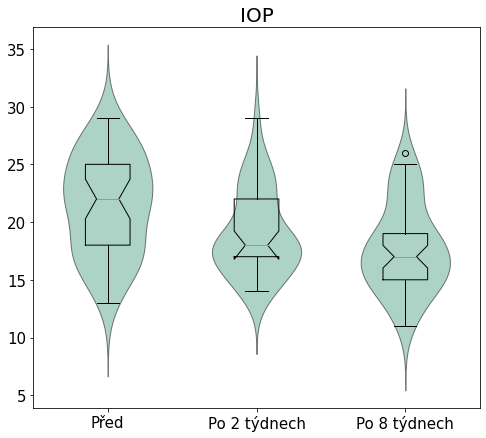

In [35]:
#boxplot IOP po odstranění odlehlých pozorování, vidíme že hodnoty IOP se snižují
generate_violin('IOP')